In [1]:
library("microbiome")
library("dplyr")
library("readr")
library("latex2exp")
library("patchwork")
library("phyloseq")

Warning message:
“package ‘microbiome’ was built under R version 4.0.3”
Loading required package: phyloseq

Warning message:
“package ‘phyloseq’ was built under R version 4.0.3”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”

microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘latex2exp’ was built under R version 4.0.

In [2]:
distributions <- read_csv("average_compositions.csv")


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  `0 strains` = col_double(),
  `1 strain` = col_double(),
  `2 strains` = col_double(),
  `3 strains` = col_double(),
  `4 strains` = col_double(),
  `5 strains` = col_double(),
  `6+ strains` = col_double()
)




In [3]:
distributions

0 strains,1 strain,2 strains,3 strains,4 strains,5 strains,6+ strains
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1353353,0.2827843,0.2822041,0.1793916,0.08172910,0.02846516,0.010090434
0.1353319,0.2827983,0.2821989,0.1793882,0.08172603,0.02846809,0.010088568
0.1353388,0.2828169,0.2822338,0.1793880,0.08170077,0.02844640,0.010075256
0.1353424,0.2858900,0.2849584,0.1787848,0.07945546,0.02668939,0.008879496
0.1353376,0.2987494,0.2885349,0.1731597,0.07332233,0.02348675,0.007409389
0.1353606,0.2828251,0.2821963,0.1793662,0.08171283,0.02845380,0.010085242
0.1383027,0.2857154,0.2818987,0.1771801,0.07981210,0.02748462,0.009606348
0.1501906,0.2924203,0.2782546,0.1701704,0.07496654,0.02532760,0.008669994


In [4]:
plot <- plot_composition(microbiome::transform(phyloseq(otu_table(distributions, taxa_are_rows=FALSE), sample_data(distributions)), "compositional"), 
                 plot.type="barplot") + scale_fill_brewer(palette = "Paired") +xlab("Simulations")
plot<- plot + scale_x_discrete( labels=c("hPoMu", "hTPMH", "hPoDM 100", "hPoDM 1","hExhPoDM","hNBDM 100","hNBDM 1","hExhNBDM"), limits = rev(levels(plot$Simulations)))  + 
theme(panel.background = element_rect(fill = "transparent"), plot.margin=grid::unit(c(0,0,0,0), "mm"),
     axis.text.x = element_text(angle = 0, vjust = 0., hjust=0.5, size=8)) + labs(fill="", x="", y="")

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



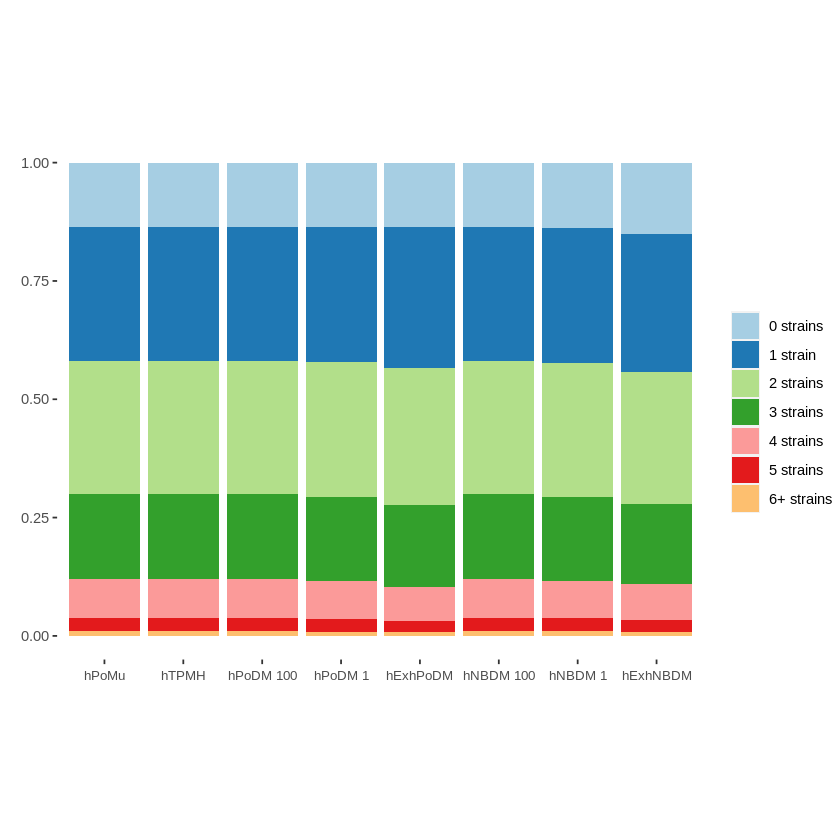

In [5]:
plot<- plot + coord_fixed(ratio=6) + theme(plot.margin=grid::unit(c(-4,0,-4,0), "cm"), 
                                   panel.spacing=grid::unit(c(-4,0,-4,0), "cm"))
plot

In [6]:
ggsave('average_compositions.png', plot, device="png")

Saving 6.67 x 6.67 in image



The following cell is a little magic to get rid of the whitespace reproducibly (i.e. not manually).

https://stackoverflow.com/a/32988863/10634604

In [7]:
system("convert average_compositions.png -trim -bordercolor white -border 20  average_compositions.png")

In [8]:
distributions_limited <- slice(distributions, c(5,1,8))
distributions_limited

0 strains,1 strain,2 strains,3 strains,4 strains,5 strains,6+ strains
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1353376,0.2987494,0.2885349,0.1731597,0.07332233,0.02348675,0.007409389
0.1353353,0.2827843,0.2822041,0.1793916,0.08172910,0.02846516,0.010090434
0.1501906,0.2924203,0.2782546,0.1701704,0.07496654,0.02532760,0.008669994


In [9]:
colnames(distributions_limited) <- c("0 types", "1 type", "2 types", "3 types", "4 types", "5 types", "6+ types")
distributions_limited

0 types,1 type,2 types,3 types,4 types,5 types,6+ types
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1353376,0.2987494,0.2885349,0.1731597,0.07332233,0.02348675,0.007409389
0.1353353,0.2827843,0.2822041,0.1793916,0.08172910,0.02846516,0.010090434
0.1501906,0.2924203,0.2782546,0.1701704,0.07496654,0.02532760,0.008669994


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



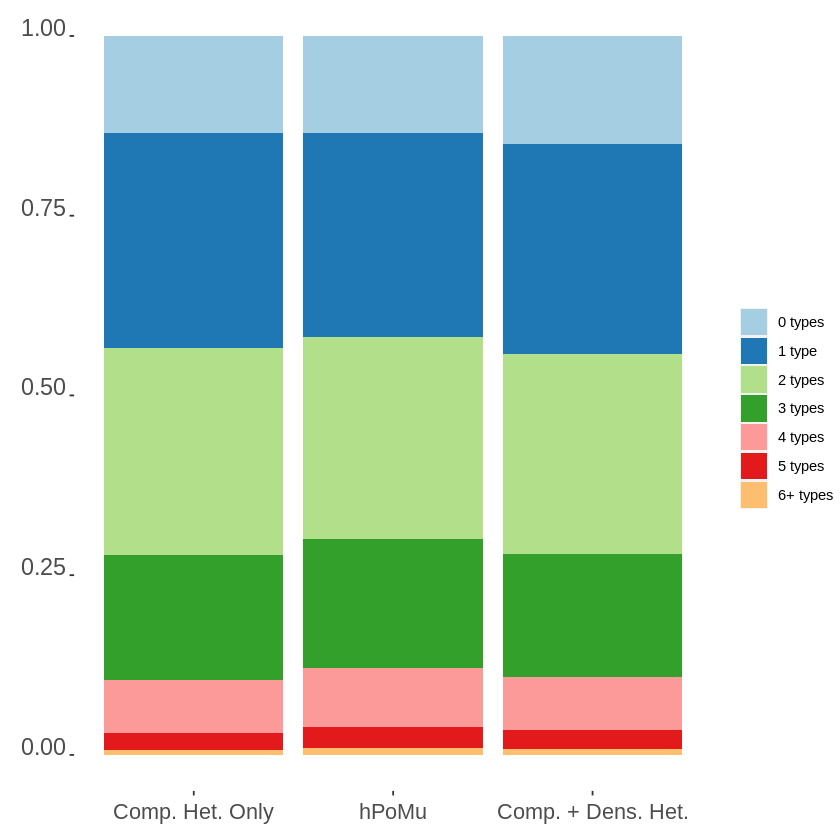

In [10]:
new_plot <- plot_composition(microbiome::transform(phyloseq(otu_table(distributions_limited, taxa_are_rows=FALSE), sample_data(distributions_limited)), "compositional"), 
                 plot.type="barplot") + scale_fill_brewer(palette = "Paired") +xlab("Simulations")
new_plot<- new_plot + scale_x_discrete( labels=c("Comp. Het. Only", "hPoMu", "Comp. + Dens. Het."), limits = rev(levels(new_plot$Simulations)))  + 
theme(panel.background = element_rect(fill = "transparent"), plot.margin=grid::unit(c(0,0,0,0), "mm"),
     axis.text.x = element_text(angle = 0, vjust = 0., hjust=0.5, size=13),
     axis.text.y = element_text(angle = 0, vjust = 0, hjust=0, size=14)) + labs(fill="", x="", y="")

new_plot

In [11]:
ggsave('average_compositions_limited.png', new_plot, device="png")
system("convert average_compositions_limited.png -trim -bordercolor white -border 20  average_compositions_limited.png")

Saving 6.67 x 6.67 in image

